# Exercise 04
# Nicolás Bernal Cod: 201014697, Felipe Carvajal Cod. 201728562

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [14]:
import zipfile
with zipfile.ZipFile('../datasets/fraud_detection.csv.zip', 'r') as z:
    f = z.open('15_fraud_detection.csv')
    data = pd.io.parsers.read_table(f, index_col=0, sep=',')

In [15]:
data.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [16]:
data.shape, data.Label.sum(), data.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [17]:
X = data.drop(['Label'], axis=1)
y = data['Label']

# Exercice 04.1

Estimate a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [93]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(C=1e9)
logreg
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:")
print(logreg.score(X_test, y_test))
print("F1-Score:")
print(f1_score(y_test,y_pred, average = 'binary'))
print("F_Beta-Score:")
print(fbeta_score(y_test,y_pred, average = 'binary',beta=10))
print("A pesar de que el modelo tiene un Accuracy muy alto (99%), el F1-Scor y el F_Beta-Score es de cero, dado que el modelo no está prediciendo ningún valor de fraude, y como los datos son desbalanceados, por esto el Accuracy es alto y las demás metricas son de cero")

Accuracy:
0.994064925391
F1-Score:
0.0
F_Beta-Score:
0.0
A pesar de que el modelo tiene un Accuracy muy alto (99%), el F1-Scor y el F_Beta-Score es de cero, dado que el modelo no está prediciendo ningún valor de fraude, y como los datos son desbalanceados, por esto el Accuracy es alto y las demás metricas son de cero


C:\Users\Nicolas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exercice 04.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [56]:
n_samples = y_train.shape[0]
print(n_samples)

97104


In [57]:
n_samples_0 = (y_train == 0).sum()
n_samples_0

96554

In [58]:
n_samples_1 = (y_train == 1).sum()
n_samples_1

550

In [59]:
n_samples_1 / n_samples

0.0056640303180095566

In [60]:
n_samples_0_new =  n_samples_1 / 0.3 - n_samples_1
n_samples_0_new

1283.3333333333335

In [61]:
n_samples_0_new_per = n_samples_0_new / n_samples_0
n_samples_0_new_per

0.013291353370480078

In [62]:
# Select all negatives
filter_ = y_train == 0

# Random sample
np.random.seed(42)
rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)

# Combine
filter_ = filter_ & rand_1

In [63]:
filter_.sum()

1268

In [65]:
filter_ = filter_ | (y_train == 1)

In [66]:
filter_ = filter_.astype(bool)

In [80]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(X_test)

def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [81]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(x_vis, y_test, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())

Target percentage 0.1
y.shape =  2444 y.mean() =  0.10106382978723404
Target percentage 0.2
y.shape =  1246 y.mean() =  0.19823434991974317
Target percentage 0.3
y.shape =  813 y.mean() =  0.3038130381303813
Target percentage 0.4
y.shape =  596 y.mean() =  0.41442953020134227
Target percentage 0.5
y.shape =  472 y.mean() =  0.5233050847457628


# Exercice 04.3

Now using random-over-sampling

In [82]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X[filter_], y[filter_]

In [83]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(x_vis, y_test, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())

Target percentage 0.1
y.shape =  45966 y.mean() =  0.007980086389926056
Target percentage 0.2
y.shape =  51712 y.mean() =  0.008607198748043818
Target percentage 0.3
y.shape =  59100 y.mean() =  0.009369287020109689
Target percentage 0.4
y.shape =  68950 y.mean() =  0.010450239281179803
Target percentage 0.5
y.shape =  82740 y.mean() =  0.010547585370781976


# Exercice 04.4*
Evaluate the results using SMOTE

Which parameters did you choose?

In [84]:
# Number of nearest neighbours to used to construct synthetic samples.
k = 5

from sklearn.neighbors import NearestNeighbors
nearest_neighbour_ = NearestNeighbors(n_neighbors=k + 1)

In [86]:
# Look for k-th nearest neighbours, excluding, of course, the
# point itself.#
nearest_neighbour_.fit(x_vis[y_test==1])

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=6, p=2, radius=1.0)

In [87]:
# Matrix with k-th nearest neighbours indexes for each minority
# element.#
nns = nearest_neighbour_.kneighbors(x_vis[y_test==1], 
                                    return_distance=False)[:, 1:]

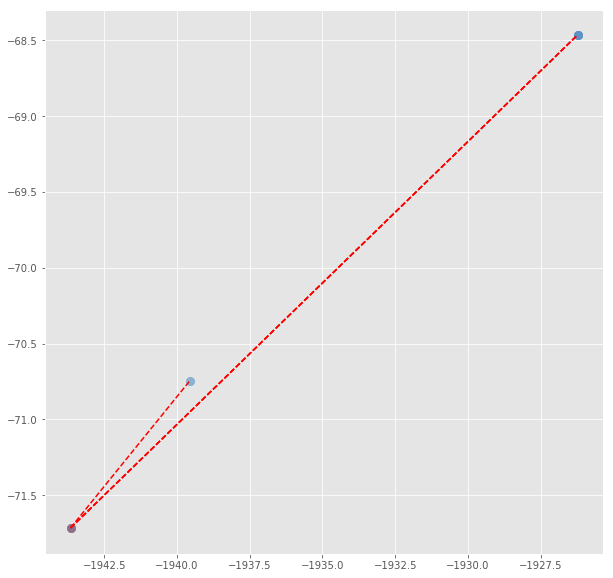

In [88]:
def base_smote_plot(sel, nns):
    fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    
    for i in range(len(sel)):
        # plot the select sample
        subplot.scatter(x_vis[y_test==1, 0][sel[i]], x_vis[y_test==1, 1][sel[i]],
                alpha=1., s=70)
        # plot the neighbors
        subplot.scatter(x_vis[y_test==1, 0][nns[sel[i]]], 
                        x_vis[y_test==1, 1][nns[sel[i]]],
                        alpha=0.5, s=70) 
        
        # plot the lines
        for nn in nns[sel[i]]:
            plt.plot([x_vis[y_test==1, 0][sel[i]], x_vis[y_test==1, 0][nn]],  
                     [x_vis[y_test==1, 1][sel[i]], x_vis[y_test==1, 1][nn]],
                     'r--') 
    
    xlim = subplot.get_xlim()
    ylim = subplot.get_ylim()
    subplot.scatter(x_vis[y_test==1, 0], x_vis[y_test==1, 1], alpha=0.1, s=70)
    subplot.set_xlim(xlim)
    subplot.set_ylim(ylim)
    return subplot
base_smote_plot([12],nns)

In [91]:
def SMOTE(X, y, target_percentage=0.3, k=6, seed=None):
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, x_vis.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

In [92]:
for target_percentage in [0.15, 0.30, 0.45]:
    for k in [6, 12]:
        X_u, y_u = SMOTE(x_vis, y_test, target_percentage, k, seed=3)
        print('Target percentage', target_percentage, 'k ', k)
        print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())

Target percentage 0.15 k  6
y.shape =  58105 y.mean() =  0.288013079769
Target percentage 0.15 k  12
y.shape =  58105 y.mean() =  0.288013079769
Target percentage 0.3 k  6
y.shape =  82447 y.mean() =  0.498223100901
Target percentage 0.3 k  12
y.shape =  82447 y.mean() =  0.498223100901
Target percentage 0.45 k  6
y.shape =  120065 y.mean() =  0.655436638487
Target percentage 0.45 k  12
y.shape =  120065 y.mean() =  0.655436638487


# Exercice 04.5

Estimate a Logistic Regression, GaussianNB, K-nearest neighbors and a Decision Tree **Classifiers**

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Combine the classifiers and comment

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [98]:
models = {'lr': LogisticRegression(),
          'dt': DecisionTreeClassifier(),
          'nb': GaussianNB(),
          'nn': KNeighborsClassifier()}

In [99]:
# Train all the models
for model in models.keys():
    models[model].fit(X_train, y_train)

In [101]:
# predict test for each model
y_pred = pd.DataFrame(index=y_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [102]:
# Evaluate each model
from sklearn.metrics import mean_squared_error

for model in models.keys():
    print(model, models[model].score(X_test, y_test))
    print(model,f1_score(y_pred[model], y_test))
    print(model,fbeta_score(y_pred[model], y_test, beta = 10))

lr 0.994064925391
lr 0.0
lr 0.0
dt 0.988730566836
dt 0.133086876155
dt 0.122643100482
nb 0.982098661605
nb 0.00534045393858
nb 0.00400420243027


C:\Users\Nicolas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


nn 0.99382463897
nn 0.085409252669
nn 0.332327940773


In [ ]:
#DecisionTreeClassifier y KNeighborsClassifier tienen los mejores resultados, un Accuracy alto y un F score mayor a cero.
#Esto indica que para clases desbalanceadas estos tipos de algoritmos permiten realizar una clasificación adecuada.

# Exercice 04.6

Using the under-sampled dataset

Evaluate a RandomForestClassifier and compare the results

change n_estimators=100, what happened

In [107]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(X_test)

def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [108]:
for target_percentage in [0.3]:
    X_u, y_u = UnderSampling(x_vis, y_test, target_percentage, 1)

In [109]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [110]:
# list of values to try for n_estimators
estimator_range = range(10, 100, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    MSE_scores = cross_val_score(rfreg, X_u, y_u, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

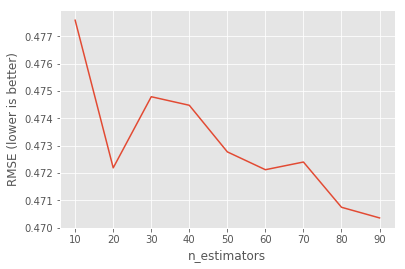

In [111]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

In [124]:
# list of values to try for max_features
feature_range = range(1, len(X)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=20, max_features=feature, random_state=1, n_jobs=-1)


In [119]:
# max_features=8 is best and n_estimators=150 is sufficiently large
rfreg = RandomForestRegressor(n_estimators=100, max_features=2, max_depth=3, oob_score=True, random_state=1)
rfreg.fit(X_u, y_u)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=2, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=1, verbose=0, warm_start=False)

In [120]:
# compute the out-of-bag R-squared score
rfreg.oob_score_

0.1079719785745733

In [ ]:
#Cuando se cambia a n_estimators=100 el MSE tiende a disminuir